***Import required libraries.***

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

In [2]:
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


***Import dataset and print it.***

In [8]:
import io

dataset =  pd.read_csv(io.StringIO(uploaded['Mall_Customers.csv'].decode('utf-8')))
x = dataset.iloc[:, [3,4]].values

print(dataset.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


First we need to find the accurate number of clusters. To do that we'll fit the model with differnt number of clusters and decide the best one based on WCSS.

***Finding number of clusters.***

In [0]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i , init = 'k-means++' , max_iter = 300 , n_init = 10 , random_state = 0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

***The elbow graph.***

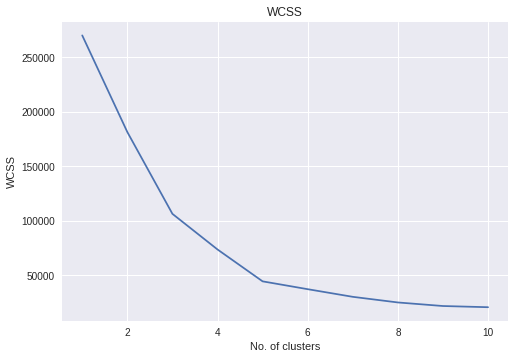

In [11]:
plt.plot(range(1,11) , wcss)
plt.title("WCSS")
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.show()

we can see the ideal number of clusters are 5.

***Now building the actual model.***

In [0]:
kmeans = KMeans(n_clusters = 5 , init = 'k-means++' , max_iter = 300 , n_init = 10 , random_state = 0)
pred = kmeans.fit_predict(x)

***Visualising the clusters.***

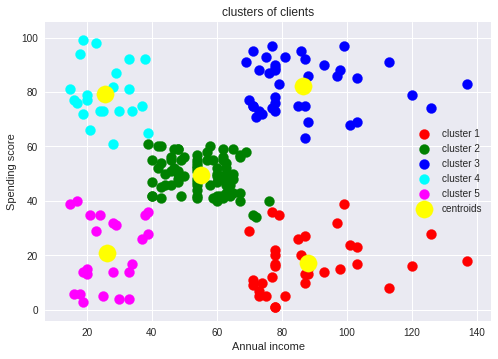

In [13]:
plt.scatter(x[pred == 0,0] , x[pred == 0,1] , s = 100 , c = 'red' , label = "cluster 1")
plt.scatter(x[pred == 1,0] , x[pred == 1,1] , s = 100 , c = 'green' , label = "cluster 2")
plt.scatter(x[pred == 2,0] , x[pred == 2,1] , s = 100 , c = 'blue' , label = "cluster 3")
plt.scatter(x[pred == 3,0] , x[pred == 3,1] , s = 100 , c = 'cyan' , label = "cluster 4")
plt.scatter(x[pred == 4,0] , x[pred == 4,1] , s = 100 , c = 'magenta' , label = "cluster 5")
plt.scatter(kmeans.cluster_centers_[:,0] , kmeans.cluster_centers_[:,1] , s = 300 , c = 'yellow' , label = 'centroids')
plt.title('clusters of clients')
plt.xlabel('Annual income')
plt.ylabel('Spending score')
plt.legend()
plt.show()

**Hence we divided the dataset into clusters.**